In [3]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
df = pd.read_excel('../raw_data/cleaned_data.xlsx')
df.head()

,Date,OKE_LYB,AAPL_MKTX,MOH_VZ,UNH_VZ,LW_OGN,AJG_BXP,AON_BXP,BRO_BXP,OKE_BXP,...,TFC_NEM,TRV_NEM,TSCO_NEM,TT_NEM,UNP_NEM,UPS_NEM,WFC_NEM,WRB_NEM,WTW_NEM,ZION_NEM
0,2022-05-20,0.613960,0.493205,6.327967,9.894877,1.688154,1.484198,2.518762,0.527496,0.600911,...,0.678417,2.511066,2.674172,1.951788,3.185898,2.547338,0.620976,0.988444,2.965878,0.774677
1,2022-05-23,0.620830,0.506572,6.356612,9.995980,1.714812,1.505977,2.534675,0.532548,0.596340,...,0.699532,2.559536,2.618457,1.956595,3.223757,2.587986,0.650692,1.005074,3.037960,0.806218
2,2022-05-24,0.624069,0.503657,6.245515,9.905870,1.708567,1.505618,2.562301,0.534924,0.600710,...,0.676767,2.526871,2.479758,1.914719,3.152396,2.524308,0.628013,0.995237,2.955466,0.776621
3,2022-05-25,0.622838,0.508753,6.218560,9.808046,1.679917,1.471815,2.481932,0.525870,0.601245,...,0.683329,2.503361,2.551275,1.931707,3.133580,2.501834,0.635268,0.991386,2.917628,0.791257
4,2022-05-26,0.615286,0.510260,5.938066,9.938056,1.715962,1.479555,2.509289,0.534717,0.597327,...,0.703057,2.552283,2.715456,1.997530,3.227883,2.597884,0.664509,1.019355,3.040985,0.821652


'OKE_LYB'

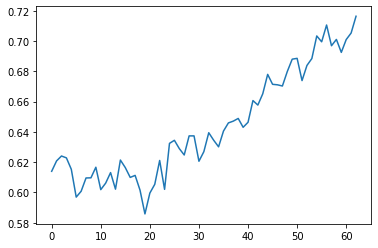

In [46]:
plt.plot(df['OKE_LYB'])
df.columns[1]



In [29]:
df.columns

Index(['Date', 'OKE_LYB', 'AAPL_MKTX', 'MOH_VZ', 'UNH_VZ', 'LW_OGN', 'AJG_BXP',
       'AON_BXP', 'BRO_BXP', 'OKE_BXP', 'PSA_BXP', 'UPS_BXP', 'AAPL_NEM',
       'AFL_NEM', 'AIG_NEM', 'AJG_NEM', 'ALL_NEM', 'AMP_NEM', 'AXP_NEM',
       'BAC_NEM', 'BR_NEM', 'BRO_NEM', 'C_NEM', 'CAH_NEM', 'CEG_NEM',
       'CFG_NEM', 'CHRW_NEM', 'CMA_NEM', 'DFS_NEM', 'DIS_NEM', 'DOV_NEM',
       'DRE_NEM', 'DRI_NEM', 'ECL_NEM', 'EMN_NEM', 'FAST_NEM', 'FITB_NEM',
       'FOXA_NEM', 'FRT_NEM', 'FTV_NEM', 'GD_NEM', 'GS_NEM', 'GWW_NEM',
       'HBAN_NEM', 'HIG_NEM', 'HWM_NEM', 'IT_NEM', 'MCK_NEM', 'MET_NEM',
       'MLM_NEM', 'MMC_NEM', 'MS_NEM', 'MTB_NEM', 'NDSN_NEM', 'NRG_NEM',
       'NSC_NEM', 'NTRS_NEM', 'NWS_NEM', 'NWSA_NEM', 'OMC_NEM', 'PFG_NEM',
       'PH_NEM', 'PLD_NEM', 'PNC_NEM', 'RF_NEM', 'RHI_NEM', 'RJF_NEM',
       'SCHW_NEM', 'SPGI_NEM', 'TDG_NEM', 'TFC_NEM', 'TRV_NEM', 'TSCO_NEM',
       'TT_NEM', 'UNP_NEM', 'UPS_NEM', 'WFC_NEM', 'WRB_NEM', 'WTW_NEM',
       'ZION_NEM'],
      dtype='object')

In [33]:
df = pd.read_excel('../raw_data/cleaned_data.xlsx')
hedges = df.columns[1:]
hedge_pairs = []
for hedge in hedges:
    hedge_pairs.append(hedge.split('_'))
print( hedge_pairs)

[['OKE', 'LYB'], ['AAPL', 'MKTX'], ['MOH', 'VZ'], ['UNH', 'VZ'], ['LW', 'OGN'], ['AJG', 'BXP'], ['AON', 'BXP'], ['BRO', 'BXP'], ['OKE', 'BXP'], ['PSA', 'BXP'], ['UPS', 'BXP'], ['AAPL', 'NEM'], ['AFL', 'NEM'], ['AIG', 'NEM'], ['AJG', 'NEM'], ['ALL', 'NEM'], ['AMP', 'NEM'], ['AXP', 'NEM'], ['BAC', 'NEM'], ['BR', 'NEM'], ['BRO', 'NEM'], ['C', 'NEM'], ['CAH', 'NEM'], ['CEG', 'NEM'], ['CFG', 'NEM'], ['CHRW', 'NEM'], ['CMA', 'NEM'], ['DFS', 'NEM'], ['DIS', 'NEM'], ['DOV', 'NEM'], ['DRE', 'NEM'], ['DRI', 'NEM'], ['ECL', 'NEM'], ['EMN', 'NEM'], ['FAST', 'NEM'], ['FITB', 'NEM'], ['FOXA', 'NEM'], ['FRT', 'NEM'], ['FTV', 'NEM'], ['GD', 'NEM'], ['GS', 'NEM'], ['GWW', 'NEM'], ['HBAN', 'NEM'], ['HIG', 'NEM'], ['HWM', 'NEM'], ['IT', 'NEM'], ['MCK', 'NEM'], ['MET', 'NEM'], ['MLM', 'NEM'], ['MMC', 'NEM'], ['MS', 'NEM'], ['MTB', 'NEM'], ['NDSN', 'NEM'], ['NRG', 'NEM'], ['NSC', 'NEM'], ['NTRS', 'NEM'], ['NWS', 'NEM'], ['NWSA', 'NEM'], ['OMC', 'NEM'], ['PFG', 'NEM'], ['PH', 'NEM'], ['PLD', 'NEM'], ['PNC',

In [34]:
def merge(stockA, stockB):
    merged_stocks = pd.merge(stock_dict[stockA], stock_dict[stockB], on='Date')
    return merged_stocks


In [ ]:
for pairs in hedge_pairs:
    merge(pairs[0],pairs[1])

Text(0.5, 0, 'x_label')

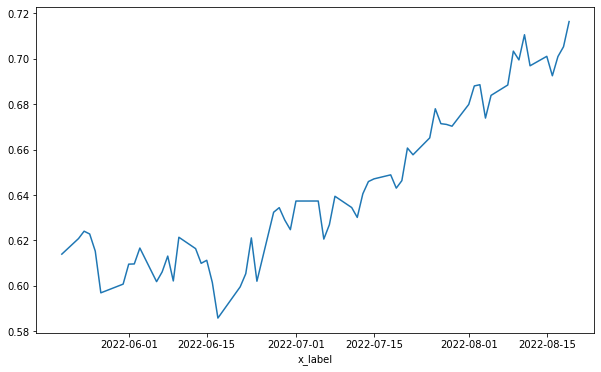

In [44]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(df['Date'],df['OKE_LYB'])
ax.set_xlabel('x_label')
